In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [19]:
# Завантажуємо датасет та конвертуємо його у DataFrame
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

In [20]:
# 1. Виводимо перші 5 рядків
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [21]:
# 2. Перевіряємо наявність пропусків і замінюємо їх на середнє значення
data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [22]:
# 3. Перевіряємо наявність дублікатів
data.duplicated().sum()

0

In [23]:
# 4. Замінюємо бінарні ознаки, перевіряємо унікальні значення в стовпці 'age'
np.unique(data['age'])



array([-0.10722563, -0.10359309, -0.09996055, -0.09632802, -0.09269548,
       -0.08906294, -0.0854304 , -0.08179786, -0.07816532, -0.07453279,
       -0.07090025, -0.06726771, -0.06363517, -0.06000263, -0.05637009,
       -0.05273755, -0.04910502, -0.04547248, -0.04183994, -0.0382074 ,
       -0.03457486, -0.03094232, -0.02730979, -0.02367725, -0.02004471,
       -0.01641217, -0.01277963, -0.00914709, -0.00551455, -0.00188202,
        0.00175052,  0.00538306,  0.0090156 ,  0.01264814,  0.01628068,
        0.01991321,  0.02354575,  0.02717829,  0.03081083,  0.03444337,
        0.03807591,  0.04170844,  0.04534098,  0.04897352,  0.05260606,
        0.0562386 ,  0.05987114,  0.06350368,  0.06713621,  0.07076875,
        0.07440129,  0.07803383,  0.08166637,  0.08529891,  0.08893144,
        0.09256398,  0.09619652,  0.11072668])

In [24]:
# 5. Перевіряємо типи даних
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [25]:
# 6. Обчислюємо кореляцію між прогресом діабету і іншими ознаками
correlation_matrix = data.corr()
corr_with_target = correlation_matrix['target'].sort_values(ascending=False)
corr_with_target

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

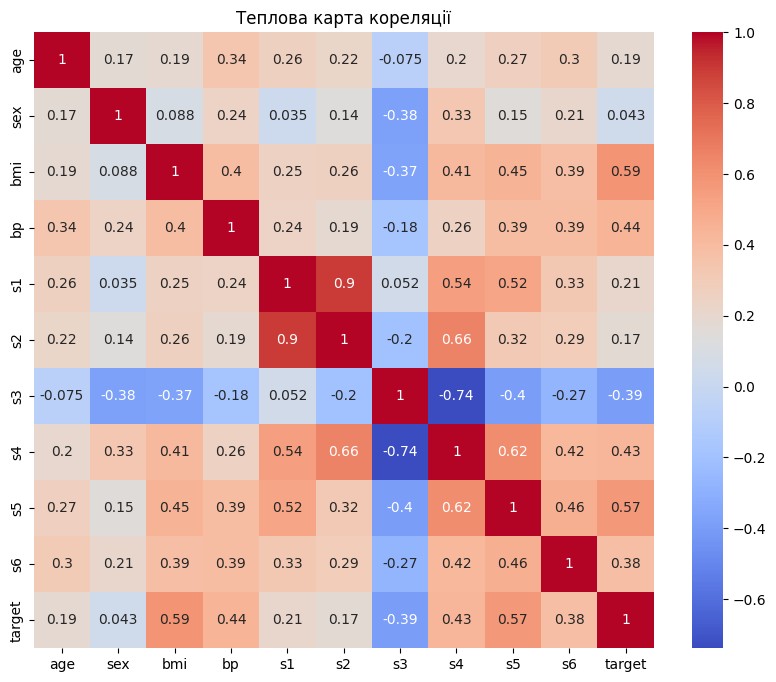

In [26]:
# Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Теплова карта кореляції")
plt.show()

In [27]:
# 7. Масштабуємо ознаки
scaler = StandardScaler()
X = data.drop('target', axis=1)
X_scaled = scaler.fit_transform(X)
y = data['target']

In [28]:
# 8. Поділяємо дані на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
# 9. Побудова моделей лінійної регресії і RandomForest регресії
# Вибираємо найбільш корелюючі ознаки
most_correlated_features = corr_with_target.index[1:6]  # Обираємо 5 найбільш корелюючих ознак
X_train_corr = X_train[:, [X.columns.get_loc(feat) for feat in most_correlated_features]]
X_test_corr = X_test[:, [X.columns.get_loc(feat) for feat in most_correlated_features]]

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train_corr, y_train)
y_pred_lin = lin_reg.predict(X_test_corr)

# RandomForest регресія
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_corr, y_train)
y_pred_rf = rf_reg.predict(X_test_corr)

In [30]:
# 10. Оцінка моделей
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)


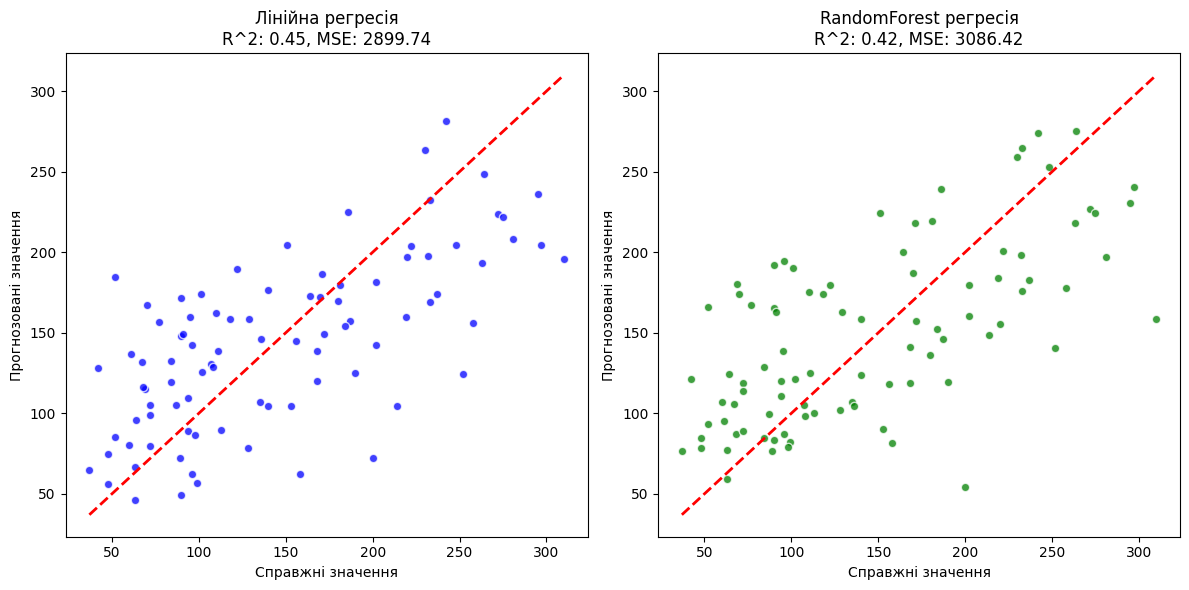

In [33]:
# 11. Побудова графіків
plt.figure(figsize=(12, 6))

# Графік для лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', edgecolor='w', alpha=0.75)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Лінійна регресія\nR^2: {r2_lin:.2f}, MSE: {mse_lin:.2f}')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

# Графік для RandomForest регресії
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', edgecolor='w', alpha=0.75)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'RandomForest регресія\nR^2: {r2_rf:.2f}, MSE: {mse_rf:.2f}')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.tight_layout()
plt.show()

На основі графіків видно, що обидві моделі, лінійна регресія та Random Forest, мають низькі значення R² (0.45 та 0.42 відповідно), що вказує на низький рівень відповідності моделі даним. Обидві моделі також демонструють високі значення MSE (2899.74 для лінійної регресії та 3086.42 для Random Forest), що свідчить про великі середні квадратичні помилки прогнозів.

З цих результатів можна зробити висновок, що жодна з моделей не показала задовільних результатів для даних, що аналізуються. Лінійна регресія має трохи кращу відповідність у порівнянні з Random Forest, проте різниця незначна, і загалом моделі потребують покращення або перегляду для досягнення кращої точності прогнозування.